In [2]:
import pandas as pd
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [4]:
#Clasifica los datos: Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).
def categorizar(amount):
    if amount >= 900:
        return 'Alta'
    elif amount >= 60:
        return 'Media'
    else:
        return 'Baja'

df['Categoria'] = df['Total Amount'].apply(categorizar)

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Categoria
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Media
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Alta
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Baja
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Media
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Media


In [5]:
#Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.

df.groupby(['Categoria','Product Category'])['Age'].mean()

Categoria  Product Category
Alta       Beauty              39.116279
           Clothing            38.620690
           Electronics         42.560440
Baja       Beauty              42.803279
           Clothing            41.630137
           Electronics         40.710843
Media      Beauty              40.118750
           Clothing            43.586387
           Electronics         41.797619
Name: Age, dtype: float64

In [6]:
mean_by_category = df.groupby('Product Category')['Total Amount'].mean().reset_index()
mean_by_category.columns = ['Product Category', 'Mean Amount']


df = df.merge(mean_by_category, on='Product Category')


df['Deviation from Mean'] = df['Total Amount'] - df['Mean Amount']

In [7]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Categoria,Mean Amount,Deviation from Mean
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Media,467.475570,-317.475570
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Alta,443.247863,556.752137
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Baja,458.786550,-428.786550
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Media,443.247863,56.752137
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Media,467.475570,-367.475570


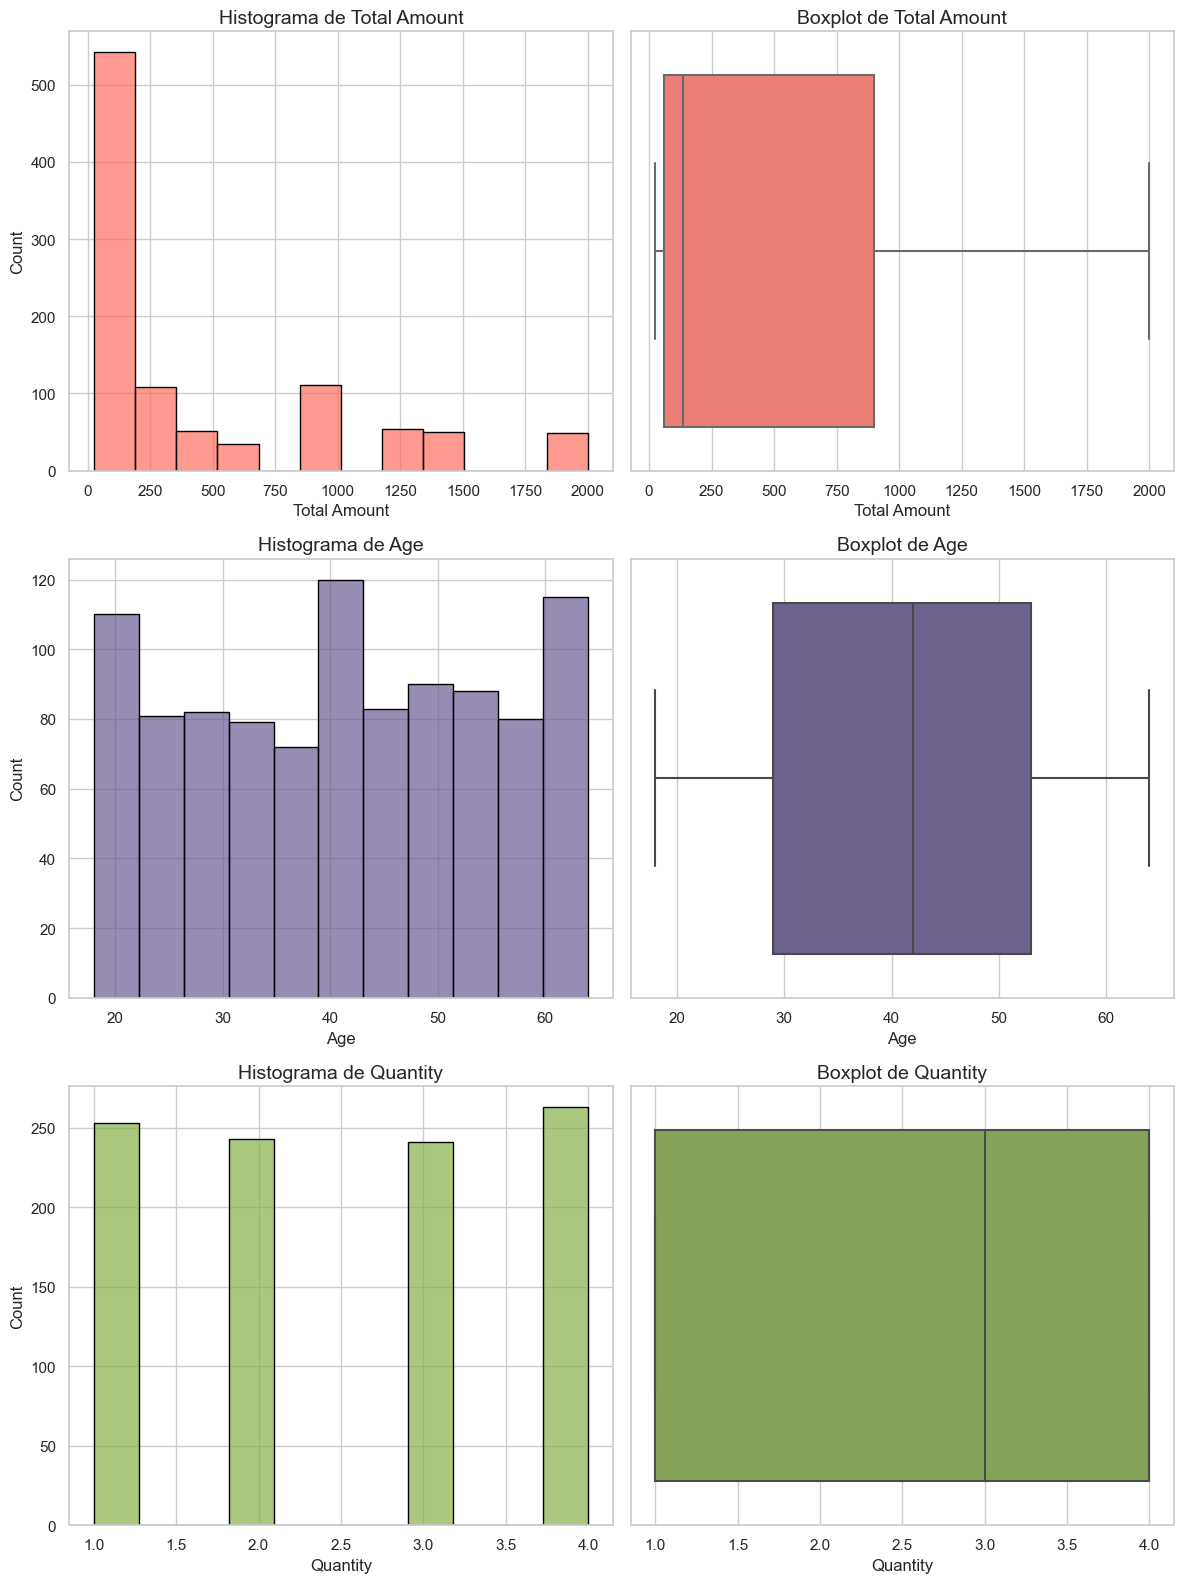

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Definir las variables
variables = ['Total Amount', 'Age', 'Quantity']

# Definir una paleta de colores
colors = ['#FF6F61', '#6B5B95', '#88B04B']

# Crear una figura con subplots para cada variable
fig, axes = plt.subplots(3, 2, figsize=(12, 16))

for i, var in enumerate(variables):
    # Histograma
    sns.histplot(df[var], color=colors[i], edgecolor='black', alpha=0.7, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {var}', fontsize=14)
    
    # Boxplot
    sns.boxplot(x=df[var], color=colors[i], ax=axes[i, 1], fliersize=5, linewidth=1.5, whis=1.5)
    axes[i, 1].set_title(f'Boxplot de {var}', fontsize=14)

# Ajustar la separación entre los gráficos
plt.tight_layout()
plt.show()

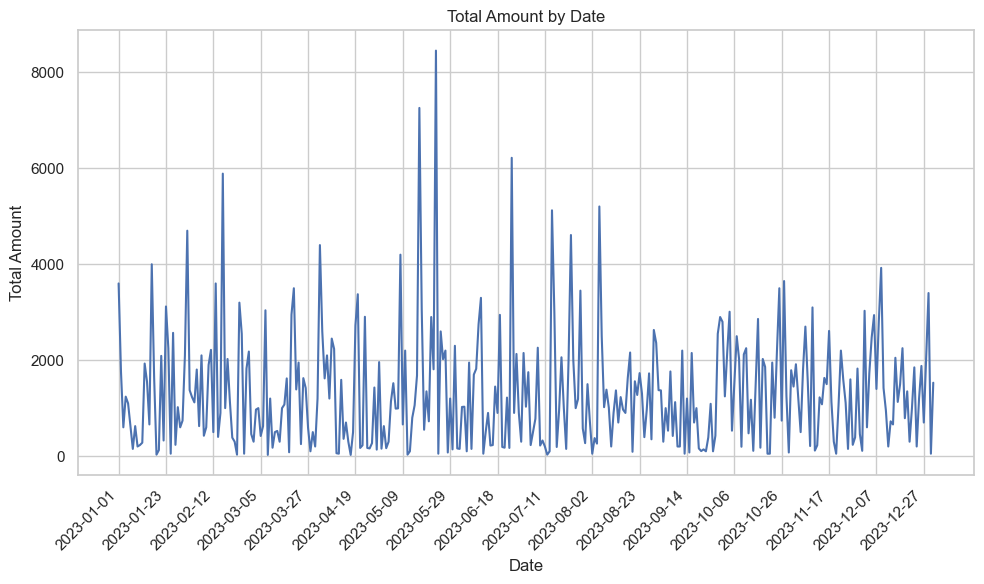

In [9]:
grouped_data = df.groupby('Date')['Total Amount'].sum()

plt.figure(figsize=(10,6))
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Total Amount by Date')
plt.grid(True)
plt.xticks(ticks=grouped_data.index[::20], rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

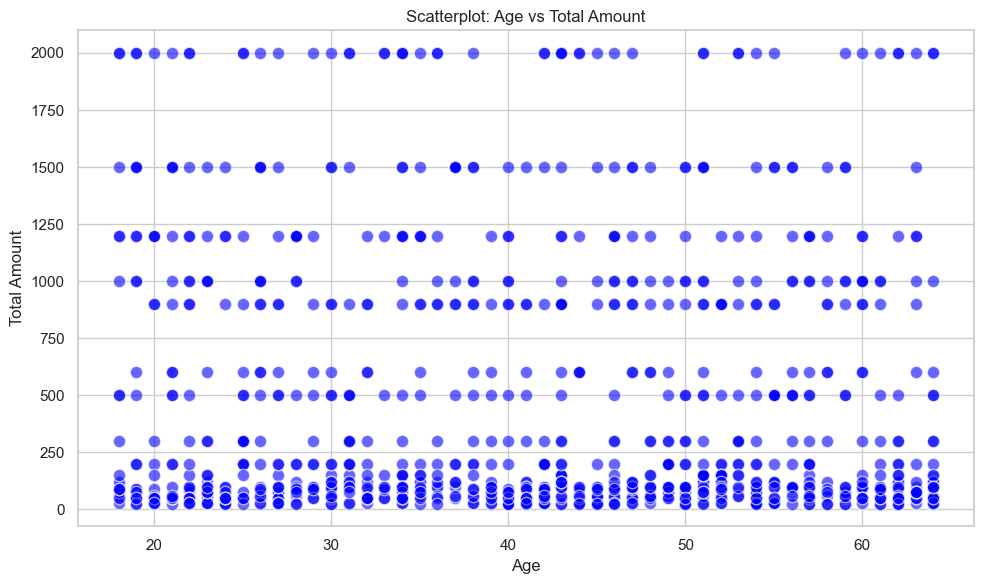

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Total Amount'], alpha=0.6, c='blue', edgecolors='w', s=80)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.title('Scatterplot: Age vs Total Amount')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

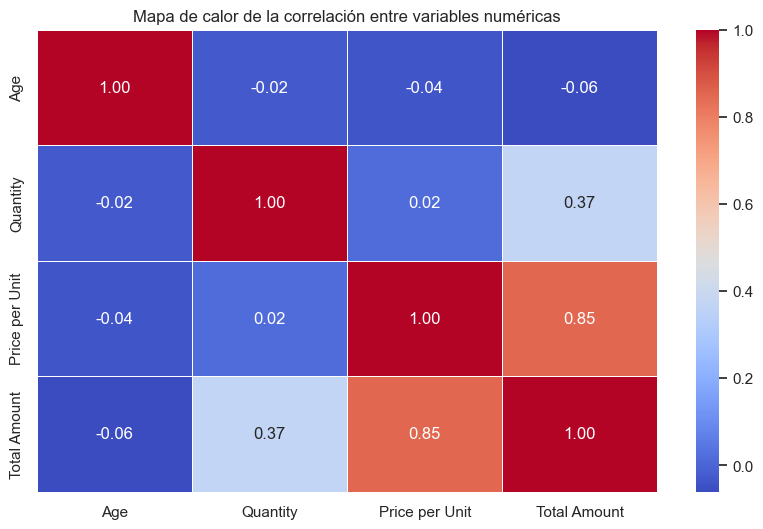

In [11]:
# Seleccionar las columnas numéricas para el análisis de correlación
numeric_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

# Calcular la matriz de correlación
correlation_matrix = df[numeric_columns].corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()